In [2]:
import os
os.chdir('..')

from instance_generator import _sample_bipartite_graph
from algorithms import cache_stochastic_opt

In [5]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

In [150]:
def estimate(A, p, num_trials, rng):
    monte_carlo_samples = []
    for _ in range(num_trials):
        coin_flips = np.array([rng.binomial(p=p_t, n=1) for p_t in p]).astype(bool)
        A_sub = A[coin_flips, :]
        row, col = linear_sum_assignment(A_sub, maximize=True)
        monte_carlo_samples.append(A_sub[row, col].sum())
    return monte_carlo_samples

def view_convergence(m, n, config, num_samples):
    rng = np.random.default_rng()
    A = _sample_bipartite_graph(m, n, rng, **config)
    p = rng.uniform(0, 1, m)
    cache = cache_stochastic_opt(A, p)
    stochastic_opt = cache[0][frozenset(np.arange(n))][0]

    trials = np.arange(1, num_samples, 1000)
    means = []
    for num_trials in trials:
        monte_carlo_samples = estimate(A, p, num_trials, rng)
        means.append(np.mean(monte_carlo_samples))

    means = np.array(means)

    _ = plt.figure(figsize=(10, 6))
    plt.plot(trials, means, label='Sample mean')
    plt.hlines(y=stochastic_opt, xmin=0, xmax=np.max(trials), color='r', linestyle='--', label='Stochastic OPT')
    plt.xlabel('Number of samples')
    plt.ylabel('Matching value')
    plt.title(f"{config['graph_type']}")
    plt.legend()
    plt.show()

    return A, p


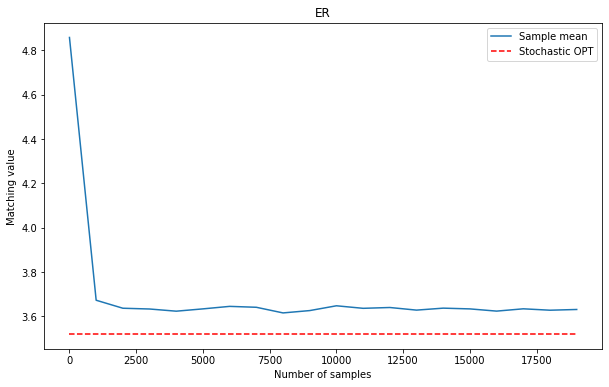

In [151]:
er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}

_, _ = view_convergence(m=10, n=6, config=er_config, num_samples=20000)

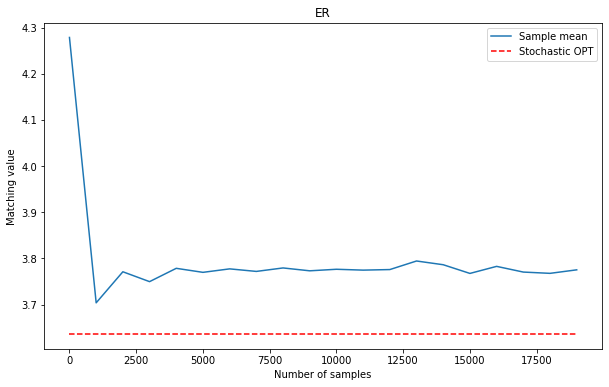

In [152]:
er_config = {
    'graph_type': 'ER',
    'p': 0.5,
    'weighted': True
}

_, _ = view_convergence(m=10, n=6, config=er_config, num_samples=20000)

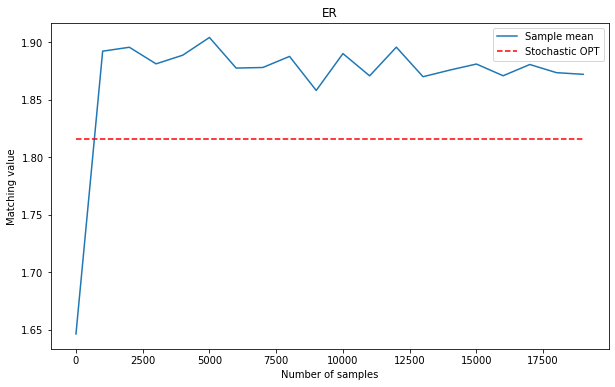

In [153]:
er_config = {
    'graph_type': 'ER',
    'p': 0.25,
    'weighted': True
}

A, p = view_convergence(m=10, n=6, config=er_config, num_samples=20000)